In [1]:
#loading Dataset
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#EDA
from collections import Counter

#data preprocessing
from sklearn.preprocessing import StandardScaler
#data Splitting
from sklearn.model_selection import train_test_split

#data modelling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#CombineallEnsembling
from mlxtend.classifier import StackingCVClassifier

In [2]:
data2 = pd.read_csv("parkinsons.csv")

In [3]:
data2

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [4]:
data2.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
data2.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
data2.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
data2.duplicated().sum()

np.int64(0)

In [9]:
data2.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [10]:
data2['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [11]:
x2 = data2.drop(columns=['name','status'],axis=1)
y2 = data2['status']

# First split: Split data into main set and test set
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, test_size=0.20, random_state=2)

# Second split: Split main set into training set and validation set
#X_train, X_validation, Y_train, Y_validation = train_test_split(X_main, Y_main, test_size=0.2, stratify=Y_main, random_state=42)

scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [12]:
Y_train2

123    1
160    1
94     1
57     1
41     1
      ..
43     0
22     1
72     1
15     1
168    0
Name: status, Length: 156, dtype: int64

In [13]:
Y_test2

10     1
79     1
164    1
142    1
186    0
133    1
35     0
137    1
25     1
2      1
12     1
128    1
144    1
3      1
48     0
29     1
14     1
119    1
6      1
23     1
108    1
143    1
129    1
174    0
45     0
120    1
173    0
125    1
9      1
163    1
54     1
13     1
109    1
194    0
78     1
114    1
44     0
82     1
158    1
Name: status, dtype: int64

In [14]:
print(Y_test2.unique())
Counter(Y_train2) #imported

[1 0]


Counter({1: 116, 0: 40})

In [18]:
#Logistic Regression Model
m = 'Logistic Regression'
lr2 = LogisticRegression()
model2 = lr2.fit(X_train2, Y_train2)
lr_predict2 = lr2.predict(X_test2)
lr_conf_matrix2 = confusion_matrix(Y_test2, lr_predict2)
lr_acc_score2 = accuracy_score(Y_test2, lr_predict2)
print("Confusion Matrix")
print(lr_conf_matrix2)
print("\n")
print("Accuracy of Logistic Regression on Test Set", lr_acc_score2*100, '\n')
print("Classification Report (Test Set):")
print(classification_report(Y_test2, lr_predict2))

Confusion Matrix
[[ 5  3]
 [ 4 27]]


Accuracy of Logistic Regression on Test Set 82.05128205128204 

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



In [20]:
#Random Forest Model
m2 = 'Random Forest Classifier'
rf2 = RandomForestClassifier(n_estimators=20, random_state=2, max_depth=5)
rf2.fit(X_train2, Y_train2)
rf_predicted2 = rf2.predict(X_test2)
rf_conf_matrix2 = confusion_matrix(Y_test2, rf_predicted2)
rf_acc_score2 = accuracy_score(Y_test2, rf_predicted2)
print("Confusion Matrix")
print(rf_conf_matrix2)
print("\n")
print("Accuracy of Random Forest", rf_acc_score2*100, '\n')
print(classification_report(Y_test2, rf_predicted2))

Confusion Matrix
[[ 6  2]
 [ 6 25]]


Accuracy of Random Forest 79.48717948717949 

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.93      0.81      0.86        31

    accuracy                           0.79        39
   macro avg       0.71      0.78      0.73        39
weighted avg       0.84      0.79      0.81        39



In [21]:
#Decision tree Model
m3 = 'Decision Tree'
dt2 = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=6)
dt2.fit(X_train2, Y_train2)
dt_predicted2 = dt2.predict(X_test2)
dt_conf_matrix2 = confusion_matrix(Y_test2, dt_predicted2)
dt_acc_score2 = accuracy_score(Y_test2, dt_predicted2)
print("Confusion Matrix")
print(dt_conf_matrix2)
print("\n")
print("Accuracy of Decision Tree", dt_acc_score2*100, '\n')
print(classification_report(Y_test2, dt_predicted2))

Confusion Matrix
[[ 7  1]
 [11 20]]


Accuracy of Decision Tree 69.23076923076923 

              precision    recall  f1-score   support

           0       0.39      0.88      0.54         8
           1       0.95      0.65      0.77        31

    accuracy                           0.69        39
   macro avg       0.67      0.76      0.65        39
weighted avg       0.84      0.69      0.72        39



In [23]:
m4 = 'Support Vector Classifier'
svc = SVC(kernel='rbf', C=2)
svc.fit(X_train2, Y_train2)
svc_predicted2 = svc.predict(X_test2)
svc_conf_matrix2 = confusion_matrix(Y_test2, svc_predicted2)
svc_acc_score2 = accuracy_score(Y_test2, svc_predicted2)
print("Confusion Matrix")
print(svc_conf_matrix2)
print("\n")
print("Accuracy of Support Vector Classifier ", svc_acc_score2*100, '\n')
print(classification_report(Y_test2, svc_predicted2))

Confusion Matrix
[[ 6  2]
 [ 2 29]]


Accuracy of Support Vector Classifier  89.74358974358975 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39



In [24]:

data2.select_dtypes(include="number").columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

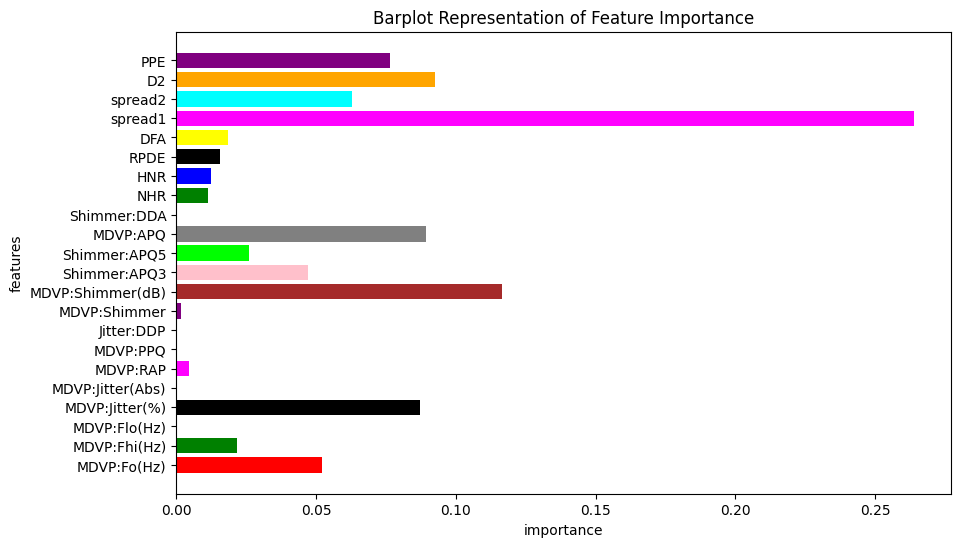

In [25]:
xgb = XGBClassifier()
xgb.fit(X_train2, Y_train2)


colors = ['red', 'green', 'blue', 'black', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'lime', 'grey']

imp_feature = pd.DataFrame({'Feature':['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'], 
                            'Importance': xgb.feature_importances_})
plt.figure(figsize=(10, 6))
plt.title("Barplot Representation of Feature Importance")
plt.xlabel("importance")
plt.ylabel("features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

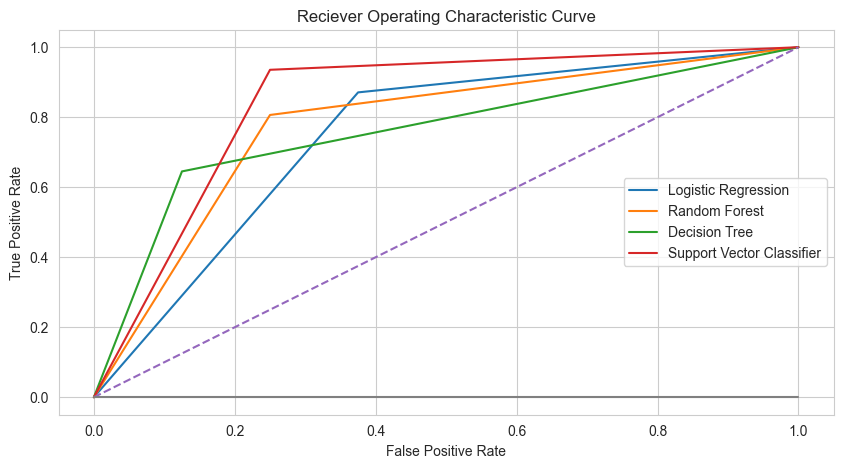

In [26]:
lr_false_positive_rate, lr_true_positive_rate, lr_threshold = roc_curve(Y_test2, lr_predict2)
rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(Y_test2, rf_predicted2)
dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(Y_test2, dt_predicted2)
svc_false_positive_rate, svc_true_positive_rate, svc_threshold = roc_curve(Y_test2, svc_predicted2)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciever Operating Characteristic Curve')
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label='Logistic Regression')
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label='Decision Tree')
plt.plot(svc_false_positive_rate, svc_true_positive_rate, label='Support Vector Classifier')

plt.plot([0,1], ls='--')
plt.plot([0,0], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [27]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Support vector Classifiers'], 
                            'Accuracy_Training_data':[lr_acc_score2*100, rf_acc_score2*100, dt_acc_score2*100, svc_acc_score2*100]})

model_ev

,Model,Accuracy_Training_data
0,Logistic Regression,82.051282
1,Random Forest,79.487179
2,Decision Tree,69.230769
3,Support vector Classifiers,89.743590


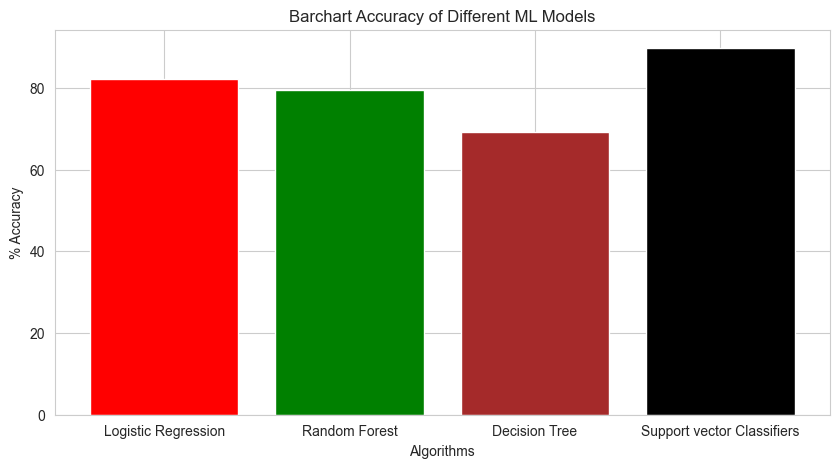

In [28]:
colors = ['red', 'green', 'brown', 'black', 'orange']
plt.figure(figsize=(10,5))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev['Model'], model_ev['Accuracy_Training_data'], color=colors)
plt.show()

In [29]:
svc_predicted2

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [30]:
Category2=['No You Dont Have Parkinsons Disease', 'Yes, You Have Parkinsons Disease..please Get All Tests Done']

In [36]:
custom_data_input2 = np.array([[122.40000,148.65000,113.81900,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.62600,0.03134,0.04518,0.04368,0.09403,0.01929,19.08500,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674

]])

In [37]:
std_data2 = scaler.transform(custom_data_input2)
std_data2

C:\Users\Prathamesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.8519173 , -0.5647171 , -0.10199324,  0.60849497,  0.96033474,
         0.36501967,  1.13887247,  0.36391772,  1.51132693,  1.58096131,
         1.38926013,  2.09442947,  1.00589922,  1.38958439, -0.18522896,
        -0.5476106 , -0.36225273,  1.86679296,  1.41405867,  1.29678349,
         0.23752136,  1.71994284]])

In [38]:

    custom_data_pred2 = svc.predict(std_data2)

In [39]:
custom_data_pred2

array([1])

In [40]:
print(Category2[int(custom_data_pred2)])

Yes, You Have Parkinsons Disease..please Get All Tests Done


C:\Users\Prathamesh\AppData\Local\Temp\ipykernel_24148\4171721548.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(Category2[int(custom_data_pred2)])


In [42]:
import pickle

filename = 'parkinsons_trained_model.sav'
pickle.dump(svc, open(filename, 'wb'))

#loading Saved Model
loaded_model = pickle.load(open('parkinsons_trained_model.sav', 'rb'))